# Análise de Dados Industriais

## Sumário
1. [Objetivo](#objetivo)
2. [KPIs Calculados](#kpis-calculados)
3. [Tecnologias Utilizadas](#tecnologias-utilizadas)
4. [Carregamento dos Dados](#carregamento-dos-dados)
5. [Análise Descritiva](#análise-descritiva)
6. [Cálculo dos KPIs](#cálculo-dos-kpis)
7. [Visualizações Gráficas](#visualizações-gráficas)
8. [Conclusões e Insights](#conclusões-e-insights)
9. [Exportação dos Resultados](#exportação-dos-resultados)

---

<a id="objetivo"></a>
## Objetivo
Este projeto visa otimizar processos industriais por meio da análise de dados e cálculo de KPIs.

---

<a id="kpis-calculados"></a>
## KPIs Calculados
- Lead Time (Tempo de Ciclo)
- Tempo de Setup
- Eficiência de Produção
- Utilização da Máquina
- Custo de Produção

---

<a id="tecnologias-utilizadas"></a>
## Tecnologias Utilizadas
- Python
- Pandas
- Matplotlib/Seaborn

---



In [1]:
import pandas as pd

df = pd.read_csv('../data/dados_producao.csv')
display(df.head())

,ID_Produto,Data_Producao,Tempo_Producao,Tempo_Setup,Quantidade_Produzida
0,P0001,2024-01-25,42,50,16
1,P0002,2024-01-22,149,21,40
2,P0003,2024-01-18,182,23,100
3,P0004,2024-01-23,66,16,83
4,P0005,2024-01-24,105,10,89


In [2]:
print("Estatísticas Descritivas:")
display(df.describe())

Estatísticas Descritivas:


,Tempo_Producao,Tempo_Setup,Quantidade_Produzida
count,10000.000000,10000.000000,10000.000000
mean,135.185600,35.096400,55.295700
std,60.873309,14.761677,26.328972
min,30.000000,10.000000,10.000000
25%,83.000000,22.000000,32.000000
50%,136.000000,35.000000,55.000000
75%,187.000000,48.000000,79.000000
max,240.000000,60.000000,100.000000


In [3]:
df['Lead_Time'] = df['Tempo_Producao'] + df['Tempo_Setup']
df['Eficiencia_Producao'] = df['Quantidade_Produzida'] / df['Tempo_Producao']
df['Utilizacao_Maquina'] = df['Tempo_Producao'] / (df['Tempo_Producao'].sum() + df['Tempo_Setup'].sum())
df['Custo_Producao'] = (df['Tempo_Producao'] + df['Tempo_Setup']) * 0.5  # Exemplo: R$ 0,50 por minuto

display(df[['Lead_Time', 'Eficiencia_Producao', 'Utilizacao_Maquina', 'Custo_Producao']].head())

,Lead_Time,Eficiencia_Producao,Utilizacao_Maquina,Custo_Producao
0,92,0.380952,0.000025,46.0
1,170,0.268456,0.000088,85.0
2,205,0.549451,0.000107,102.5
3,82,1.257576,0.000039,41.0
4,115,0.847619,0.000062,57.5


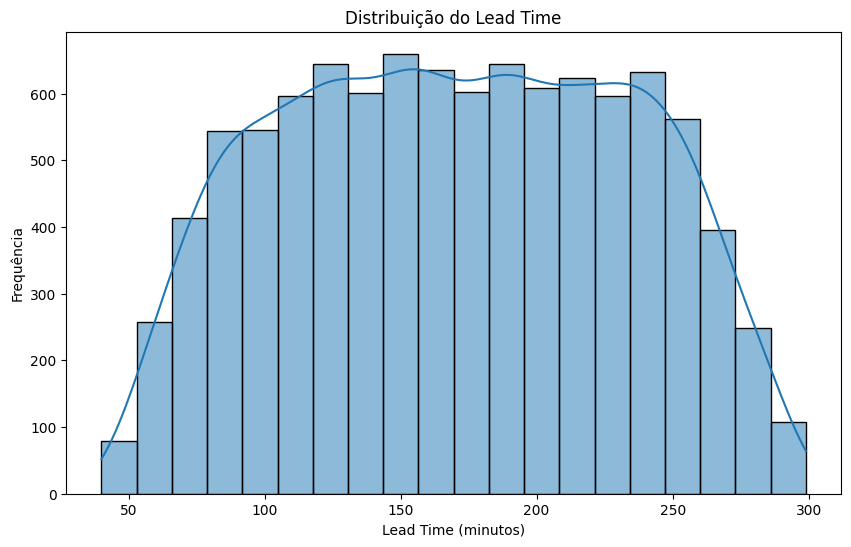

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Lead Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead_Time'], kde=True, bins=20)
plt.title("Distribuição do Lead Time")
plt.xlabel("Lead Time (minutos)")
plt.ylabel("Frequência")
plt.show()

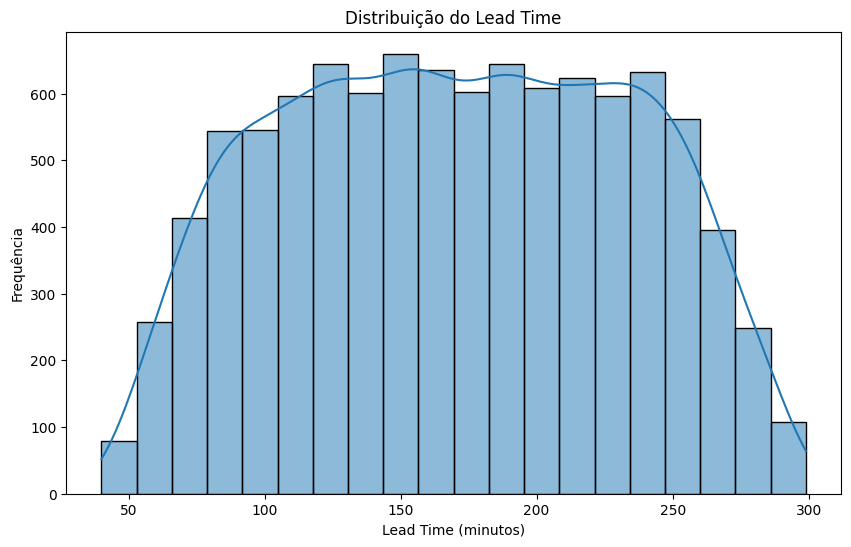

In [7]:
import os

# Salvando os dados analisados
df.to_csv('../data/dados_analisados.csv', index=False)

# Verifica se o diretório existe, se não, cria
if not os.path.exists('../docs/'):
	os.makedirs('../docs/')

# Salvando os gráficos
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead_Time'], kde=True, bins=20)
plt.title("Distribuição do Lead Time")
plt.xlabel("Lead Time (minutos)")
plt.ylabel("Frequência")
plt.savefig('../docs/lead_time.png')  # Salva o gráfico
plt.show()